In [371]:
#长沙各地区租房数据分析
import pandas as pd
import numpy as np


In [372]:
file_data=pd.read_csv('D:\python\pythonLerner\combined_output.csv')
file_data.drop(columns=['New_Index'], inplace=True)
file_data.head

<bound method NDFrame.head of            name rental_way  size toward  price place
0          楚天家园         整租  2室1厅      南   2000   开元路
1          四季美景         合租   5居室     跃层    758   四方坪
2         金侨风华府         整租  3室2厅      南   2500   麓谷西
3       珠江郦城薰衣道         合租   5居室     南卧    818  福元西路
4       荷花园众立小区         整租  3室2厅      南   2300   马王堆
..          ...        ...   ...    ...    ...   ...
745      建工集团宿舍         整租  1室1厅   LOFT   1888   浏城桥
746    保利恒伟时光印象         整租  1室1厅      南   1200   麓谷西
747  省纺织宿舍(中山路)         整租  1室0厅      北   1200   松桂园
748        名富公寓         整租  1室1厅    南/北   1450   伍家岭
749  省纺织宿舍(中山路)         整租  1室0厅      北   1388   松桂园

[750 rows x 6 columns]>

In [373]:
file_data.duplicated()
file_data=file_data.drop_duplicates()

In [374]:
file_data.head

<bound method NDFrame.head of         name rental_way  size toward  price place
0       楚天家园         整租  2室1厅      南   2000   开元路
1       四季美景         合租   5居室     跃层    758   四方坪
2      金侨风华府         整租  3室2厅      南   2500   麓谷西
3    珠江郦城薰衣道         合租   5居室     南卧    818  福元西路
4    荷花园众立小区         整租  3室2厅      南   2300   马王堆
..       ...        ...   ...    ...    ...   ...
721    中联科技园         合租   5居室     南卧    900   桐梓坡
723     红叶山庄         合租   4居室     南卧    950  岳麓山北
731      如果爱         整租  1室1厅      南   1458   四方坪
733    万科城三期         整租  1室1厅      东   1308  福元西路
737  伍家岭生活广场         整租  1室1厅      南   1468   四方坪

[384 rows x 6 columns]>

In [375]:
file_data=file_data.dropna()

房源数量，位置分析

In [376]:

print(file_data['place'].unique())

['开元路' '四方坪' '麓谷西' '福元西路' '马王堆' '武广新城' '高桥' '岳麓其他' '烈士公园' '广电' '晚报' '银盆岭'
 '湘江世纪城' '汽车东站' '开福区政府' '窑岭' '赤岗冲' '万家丽北' '韶山南路' '金霞' '中南汽车世界' '火车站'
 '铁道学院' '喜盈门' '泉塘' '雷锋大道' '浏城桥' '星沙其他' '德思勤' '黄土岭' '南郊公园' '桐梓坡' '松桂园'
 '洋湖垸' '尚东' '梅溪湖南岸' '河西人人乐' '商学院' '金星北' '芙蓉区政府' '金盆岭' '暮云' '北辰三角洲' '望城区'
 '五一广场' '东塘' '梅溪湖北岸' '伍家岭' '东方红' '松雅湖' '观沙岭' '书院路' '新开铺' '德政园' '省政府' '雨花亭'
 '雷锋镇' '含浦' '左家塘' '树木岭' '桂花村' '阳光100' '井湾子' '枫林三路' '金星中路' '汽车西站' '河西步步高'
 '滨江新城' '月湖' '岳麓山北']


In [377]:
#建立两列的表格
new_df=pd.DataFrame({'district':file_data['place'].unique(),'number':[0]*len(file_data['place'].unique())})
print(new_df)

   district  number
0       开元路       0
1       四方坪       0
2       麓谷西       0
3      福元西路       0
4       马王堆       0
..      ...     ...
65     汽车西站       0
66    河西步步高       0
67     滨江新城       0
68       月湖       0
69     岳麓山北       0

[70 rows x 2 columns]


In [378]:
#进行分组并进行排序
groupy_area=file_data.groupby(by='place').count()
new_df['number']=groupy_area.values
new_df.sort_values(by=['number'],ascending=False)

,district,number
66,河西步步高,22
56,雷锋镇,20
25,雷锋大道,18
37,商学院,14
44,五一广场,14
...,...,...
16,赤岗冲,1
57,含浦,1
10,晚报,1
55,雨花亭,1


需要对数据进行处理，以获得户型的数据

In [379]:
df = pd.read_csv('D:\python\pythonLerner\combined_output.csv')
def generate_descriptive_house_type(living_rooms, bedrooms, bathrooms):  
    living_rooms_desc = f"{living_rooms}室" if living_rooms > 0 else ""  
    bedrooms_desc = f"{bedrooms}厅" if bedrooms > 0 else ""  
    bathrooms_desc = f"{bathrooms}卫" if bathrooms > 0 else ""  
    return living_rooms_desc + bedrooms_desc + bathrooms_desc.rstrip('卫') + ('卫' if bathrooms > 0 else '')  
  
# 使用描述性户型名称生成列  

# 显示修改后的DataFrame  
print(df['size'])  

0      2室1厅
1       5居室
2      3室2厅
3       5居室
4      3室2厅
       ... 
745    1室1厅
746    1室1厅
747    1室0厅
748    1室1厅
749    1室0厅
Name: size, Length: 750, dtype: object


In [380]:
#重新读取数据
file_data=pd.read_csv('D:\python\pythonLerner\combined_output.csv')
file_data.drop(columns=['New_Index'], inplace=True)
file_data.duplicated()
file_data=file_data.drop_duplicates()
file_data=file_data.dropna()
file_data.head

<bound method NDFrame.head of         name rental_way  size toward  price place
0       楚天家园         整租  2室1厅      南   2000   开元路
1       四季美景         合租   5居室     跃层    758   四方坪
2      金侨风华府         整租  3室2厅      南   2500   麓谷西
3    珠江郦城薰衣道         合租   5居室     南卧    818  福元西路
4    荷花园众立小区         整租  3室2厅      南   2300   马王堆
..       ...        ...   ...    ...    ...   ...
721    中联科技园         合租   5居室     南卧    900   桐梓坡
723     红叶山庄         合租   4居室     南卧    950  岳麓山北
731      如果爱         整租  1室1厅      南   1458   四方坪
733    万科城三期         整租  1室1厅      东   1308  福元西路
737  伍家岭生活广场         整租  1室1厅      南   1468   四方坪

[384 rows x 6 columns]>

In [381]:
def all_house(arr):
    key=np.unique(arr)
    result={}
    for k in key:
        mask = (arr==k)
        arr_new=arr[mask]
        v=arr_new.size
        result[k]=v
    return result

In [382]:
#获取户型数据
house_array=file_data['size']
house_info=all_house(house_array)
print(house_info)
#将户型数量大于50的元素筛选出来
house_type=dict((key,value)for key,value in house_info.items()if value>1)

{'1室0厅': 26, '1室1厅': 69, '2室0厅': 1, '2室1厅': 33, '2室2厅': 17, '3室1厅': 13, '3室2厅': 79, '3居室': 2, '4室1厅': 1, '4室2厅': 36, '4居室': 51, '5室2厅': 7, '5室3厅': 1, '5居室': 48}


In [383]:
show_house=pd.DataFrame({'descriptive_house_type':[x for x in house_type.keys()],'number':[x for x in house_type.values()]})
print(show_house)

   descriptive_house_type  number
0                    1室0厅      26
1                    1室1厅      69
2                    2室1厅      33
3                    2室2厅      17
4                    3室1厅      13
5                    3室2厅      79
6                     3居室       2
7                    4室2厅      36
8                     4居室      51
9                    5室2厅       7
10                    5居室      48


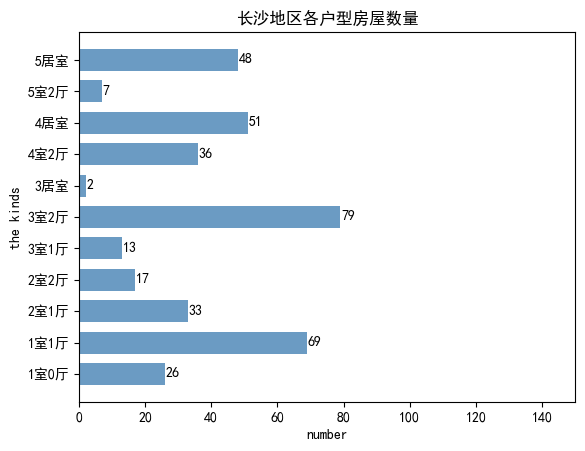

In [384]:
#绘制条形图
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体 
house_type=show_house['descriptive_house_type']
house_type_num=show_house['number']
plt.barh(range(11),house_type_num,height=0.7,color='steelblue',alpha=0.8)
plt.yticks(range(11),house_type)
plt.xlim(0,150)
plt.xlabel("number")
plt.ylabel("the kinds")
plt.title("长沙地区各户型房屋数量")
for x,y in enumerate(house_type_num):
    plt.text(y+0.2,x-0.1,'%s' %y)
plt.show()

进行租金和面积分析

In [385]:
print(file_data['place'].unique())

['开元路' '四方坪' '麓谷西' '福元西路' '马王堆' '武广新城' '高桥' '岳麓其他' '烈士公园' '广电' '晚报' '银盆岭'
 '湘江世纪城' '汽车东站' '开福区政府' '窑岭' '赤岗冲' '万家丽北' '韶山南路' '金霞' '中南汽车世界' '火车站'
 '铁道学院' '喜盈门' '泉塘' '雷锋大道' '浏城桥' '星沙其他' '德思勤' '黄土岭' '南郊公园' '桐梓坡' '松桂园'
 '洋湖垸' '尚东' '梅溪湖南岸' '河西人人乐' '商学院' '金星北' '芙蓉区政府' '金盆岭' '暮云' '北辰三角洲' '望城区'
 '五一广场' '东塘' '梅溪湖北岸' '伍家岭' '东方红' '松雅湖' '观沙岭' '书院路' '新开铺' '德政园' '省政府' '雨花亭'
 '雷锋镇' '含浦' '左家塘' '树木岭' '桂花村' '阳光100' '井湾子' '枫林三路' '金星中路' '汽车西站' '河西步步高'
 '滨江新城' '月湖' '岳麓山北']


In [386]:
import random
file_data['area'] = file_data['price']*(1/45)
for i in range(len(file_data['area'])):
    file_data['area']+=random.uniform(0,0.1)
df_all=pd.DataFrame({'district':file_data['place'].unique(),'rent':[0]*len(file_data['place'].unique()),'sqmeters':[0]*len(file_data['place'].unique())})

In [387]:
#计算区域总面积和价格

sum_price=file_data['price'].groupby(file_data['place']).sum()
sum_area=file_data['area'].groupby(file_data['place']).sum()
df_all['rent']=sum_price.values
df_all['sqmeters']=sum_area.values

In [388]:
#计算每平方米租金
for i in range(len(df_all)):
    if df_all['district'][i]=='五一广场':
        df_all['rent'][i]+=df_all['rent'][i]*2
        print(df_all['sqmeters'][i])
df_all['price/sqmeters']=round(df_all['rent']/df_all['sqmeters'],2)
print(df_all)
#合并new_def与df_all
df_merge=pd.merge(new_df,df_all)

856.5406420197241
   district   rent     sqmeters  price/sqmeters
0       开元路   6000   191.115852           31.39
1       四方坪  18348   600.341728           30.56
2       麓谷西  17600   468.154469           37.59
3      福元西路  14300   414.081975           34.53
4       马王堆   7766   268.881975           28.88
..      ...    ...          ...             ...
65     汽车西站   8703   308.965037           28.17
66    河西步步高  27492  1034.671803           26.57
67     滨江新城  12348   389.965037           31.66
68       月湖  20800   597.048099           34.84
69     岳麓山北   9550   308.526420           30.95

[70 rows x 4 columns]


C:\Users\86139\AppData\Local\Temp\ipykernel_14216\3069670057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['rent'][i]+=df_all['rent'][i]*2


In [389]:
print(df_all)

   district   rent     sqmeters  price/sqmeters
0       开元路   6000   191.115852           31.39
1       四方坪  18348   600.341728           30.56
2       麓谷西  17600   468.154469           37.59
3      福元西路  14300   414.081975           34.53
4       马王堆   7766   268.881975           28.88
..      ...    ...          ...             ...
65     汽车西站   8703   308.965037           28.17
66    河西步步高  27492  1034.671803           26.57
67     滨江新城  12348   389.965037           31.66
68       月湖  20800   597.048099           34.84
69     岳麓山北   9550   308.526420           30.95

[70 rows x 4 columns]


([<matplotlib.axis.XTick at 0x227abde8750>,
 [Text(0, 0, '开元路'),
  Text(1, 0, '四方坪'),
  Text(2, 0, '麓谷西'),
  Text(3, 0, '福元西路'),
  Text(4, 0, '马王堆'),
  Text(5, 0, '武广新城'),
  Text(6, 0, '高桥'),
  Text(7, 0, '岳麓其他'),
  Text(8, 0, '烈士公园'),
  Text(9, 0, '广电'),
  Text(10, 0, '晚报'),
  Text(11, 0, '银盆岭'),
  Text(12, 0, '湘江世纪城'),
  Text(13, 0, '汽车东站'),
  Text(14, 0, '开福区政府'),
  Text(15, 0, '窑岭'),
  Text(16, 0, '赤岗冲'),
  Text(17, 0, '万家丽北'),
  Text(18, 0, '韶山南路'),
  Text(19, 0, '金霞'),
  Text(20, 0, '中南汽车世界'),
  Text(21, 0, '火车站'),
  Text(22, 0, '铁道学院'),
  Text(23, 0, '喜盈门'),
  Text(24, 0, '泉塘'),
  Text(25, 0, '雷锋大道'),
  Text(26, 0, '浏城桥'),
  Text(27, 0, '星沙其他'),
  Text(28, 0, '德思勤'),
  Text(29, 0, '黄土岭'),
  Text(30, 0, '南郊公园'),
  Text(31, 0, '桐梓坡'),
  Text(32, 0, '松桂园'),
  Text(33, 0, '洋湖垸'),
  Text(34, 0, '尚东'),
  Text(35, 0, '梅溪湖南岸'),
  Text(36, 0, '河西人人乐'),
  Text(37, 0, '商学院'),
  Text(38, 0, '金星北'),
  Text(39, 0, '芙蓉区政府'),
  Text(40, 0, '金盆岭'),
  Text(41, 0, '暮云'),
  Text(42, 0, '北辰三角洲'),
  

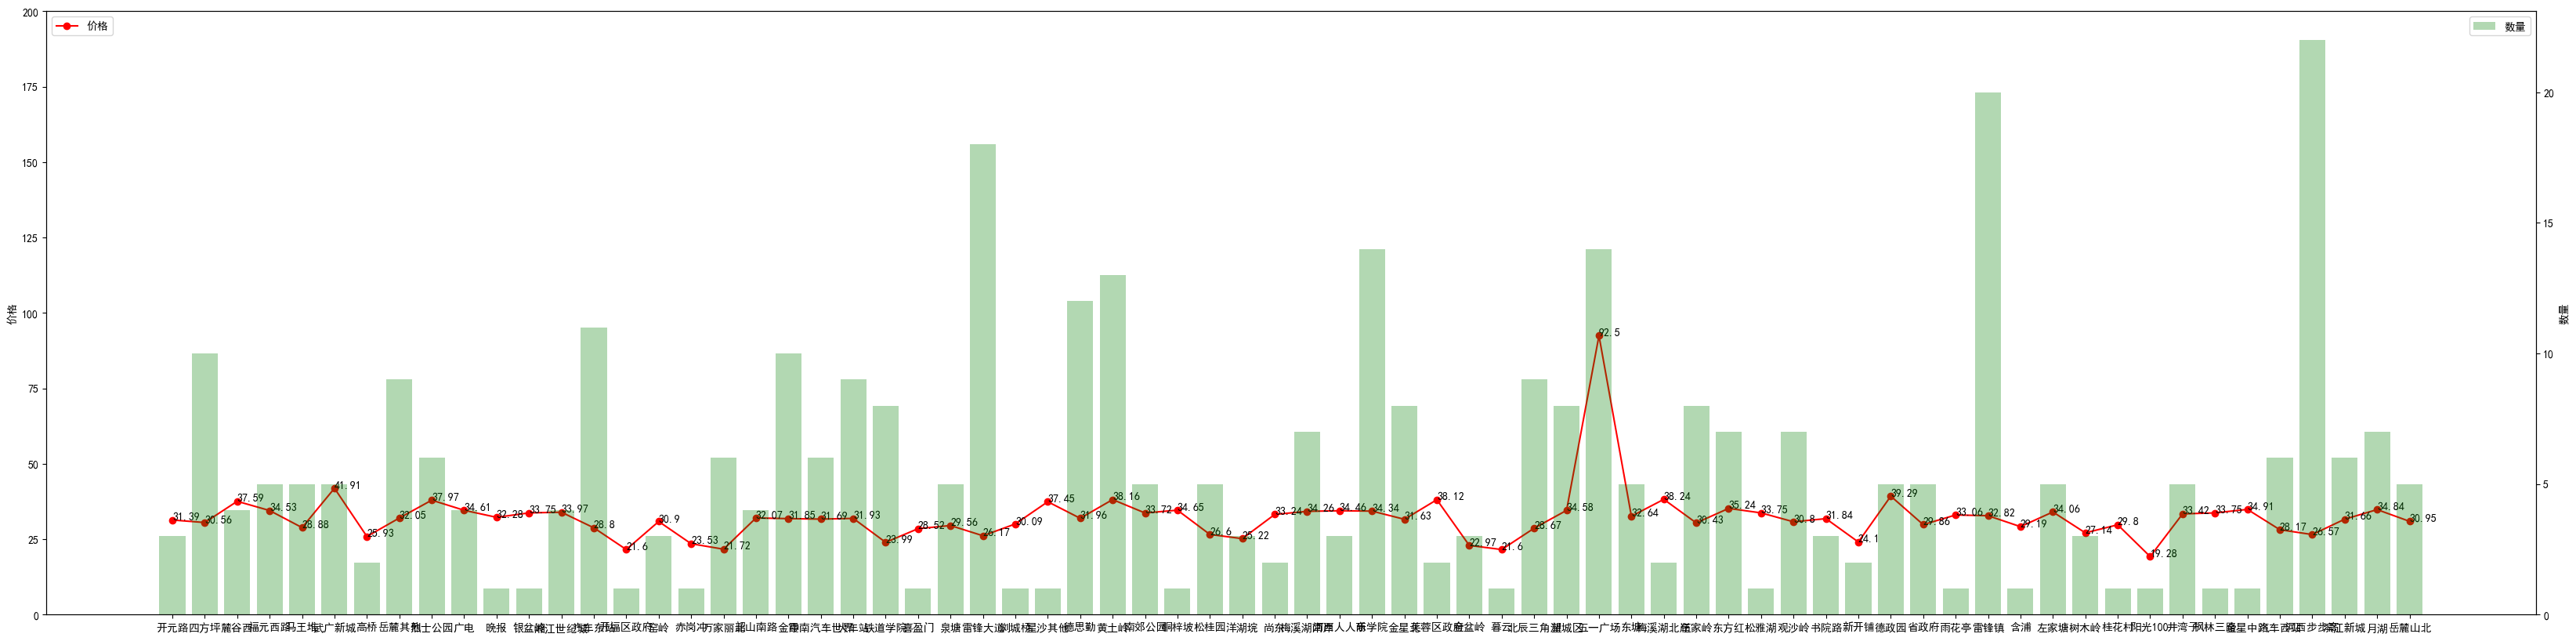

In [390]:
#绘制图像
num=df_merge['number']
price=df_merge['price/sqmeters']
l=[i for i in range(70)]
lx=df_merge['district']
fig=plt.figure(figsize=(41,10),dpi=100)
ax1=fig.add_subplot(111)
ax1.plot(l,price,'or-',label='价格')
for i,(_x,_y) in enumerate(zip(l,price)):
    plt.text(_x,_y,price[i])
ax1.set_ylim([0,200])
ax1.set_ylabel('价格')
plt.legend(loc='upper left')
ax2=ax1.twinx()
plt.bar(l,num,alpha=0.3,color='green',label='数量')
ax2.set_ylabel('数量')
plt.legend(loc="upper right")
plt.xticks(l,lx)

面积分析

In [391]:
print('房屋最大面积是%d平米'%(file_data['area'].max()))
print('房屋最小面积是%d平米'%(file_data['area'].min()))

房屋最大面积是437平米
房屋最小面积是28平米


In [392]:
print('房租最高价格是%d元'%(file_data['price'].max()))
print('房租最低价格是%d元'%(file_data['price'].min()))



房租最高价格是18800元
房租最低价格是438元


In [393]:
area_divide=[30,50,70,90,120,140,160,600]
area_cut=pd.cut(list(file_data['area']),area_divide)
area_cut_data=area_cut.describe()


In [394]:
area_percentage=(area_cut_data['freqs'].values)*100
print(area_percentage)

[33.07291667 30.98958333 17.96875    11.19791667  1.30208333  0.78125
  4.42708333  0.26041667]


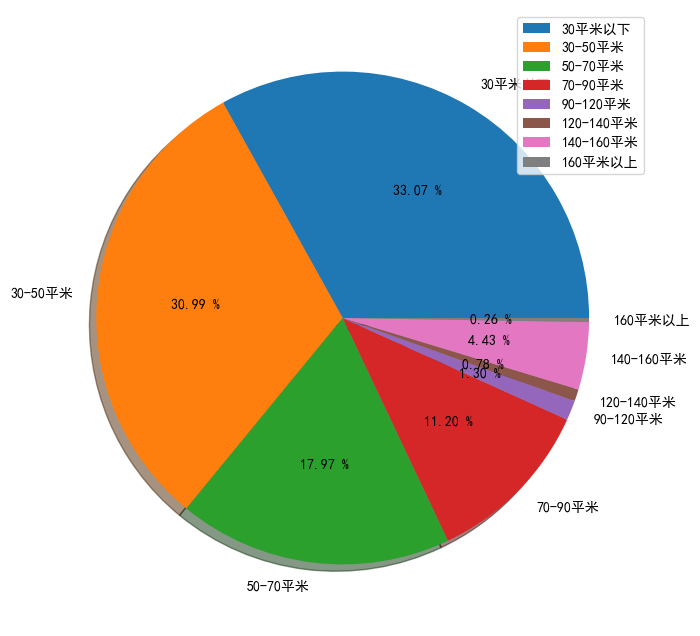

In [395]:

labels=['30平米以下','30-50平米','50-70平米','70-90平米','90-120平米','120-140平米','140-160平米','160平米以上']
plt.figure(figsize=(20,8),dpi=100)
plt.axes(aspect=1)
plt.pie(x=area_percentage,labels=labels,autopct='%.2f %%',shadow=True)
plt.legend(loc='upper right')
plt.show()